In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\wcp\dataset\worldcities.csv")

In [4]:
df.shape

(48056, 11)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isna().sum()

In [ ]:
df.dropna(subset=['population'])

In [ ]:
df.head()

In [ ]:
df.isna().sum()

In [5]:
df['country'].unique()
df['city'].nunique()

44509

In [6]:
df.sort_values('population', ascending=False).head(10)


,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6870,139.7495,Japan,JP,JPN,Tōkyō,primary,37785000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629
5,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,24922000.0,1608618140
6,Shanghai,Shanghai,31.2286,121.4747,China,CN,CHN,Shanghai,admin,24073000.0,1156073548
7,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,23086000.0,1076532519
8,Seoul,Seoul,37.5667,126.9833,"Korea, South",KR,KOR,Seoul,primary,23016000.0,1410836482
9,Mexico City,Mexico City,19.4333,-99.1333,Mexico,MX,MEX,Ciudad de México,primary,21804000.0,1484247881


In [7]:
df['country'].value_counts().head(10)


country
India             7108
United States     5344
Brazil            2961
Germany           1759
China             1732
Philippines       1584
United Kingdom    1365
Italy             1357
Japan             1344
France            1160
Name: count, dtype: int64

In [ ]:
# 1. fill missing value in city_ascii
df['city_ascii'] = df['city_ascii'].fillna(df['city'])

In [ ]:
# recheck isna
df.isna().sum()

In [ ]:
# 2. missing admin_name with 'unknown'
df['admin_name'] = df['admin_name'].fillna('unknown')

In [ ]:
# recheck isna
df.isna().sum()

In [ ]:
# 3. dropna from population
df = df.dropna(subset=['population'])

In [ ]:
df.isna().sum()

In [ ]:
df['capital'].fillna('0', inplace=True)

In [ ]:
df.to_csv(r'C:\Users\Admin\Downloads\wcp\cleaned_dataset.csv', index=False)

In [9]:
# Basic Visualization

import matplotlib.pyplot as plt
import seaborn as sns

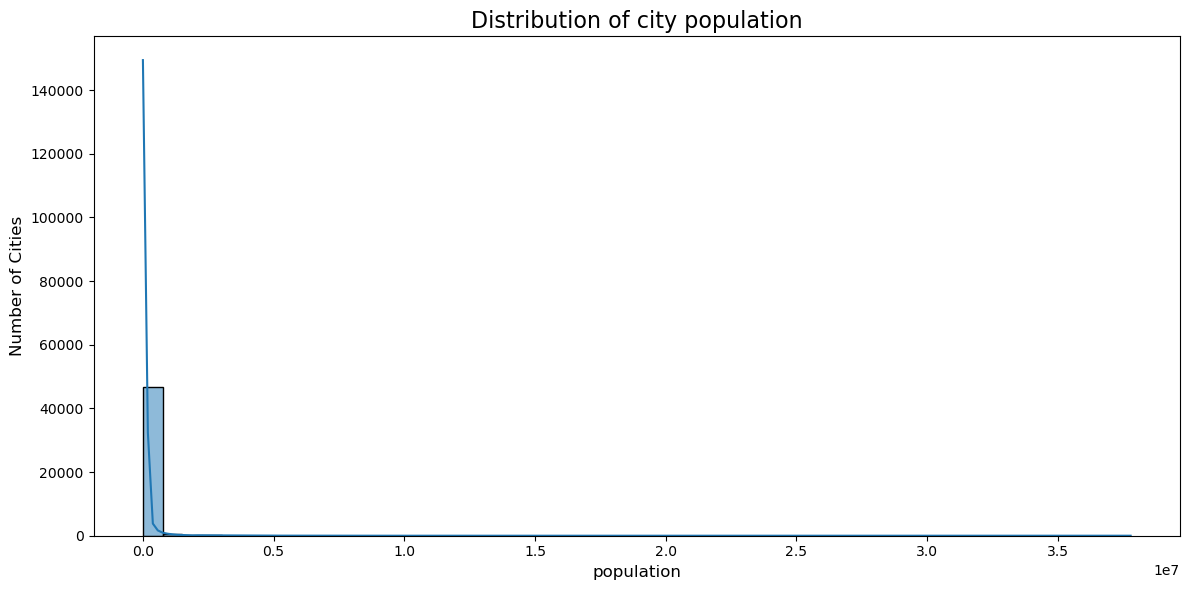

In [10]:
# Population distribution of cities
plt.figure(figsize=(12,6))
sns.histplot(df['population'], bins=50, kde=True)
plt.title('Distribution of city population', fontsize=16)
plt.xlabel('population', fontsize=12)
plt.ylabel('Number of Cities', fontsize=12)
plt.tight_layout()
plt.show()

In [11]:
# sort the df 
top_cities = df.sort_values(by= 'population', ascending=False).head(20)

C:\Users\Admin\AppData\Local\Temp\ipykernel_23444\1083023490.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='population', y='city', palette='viridis')


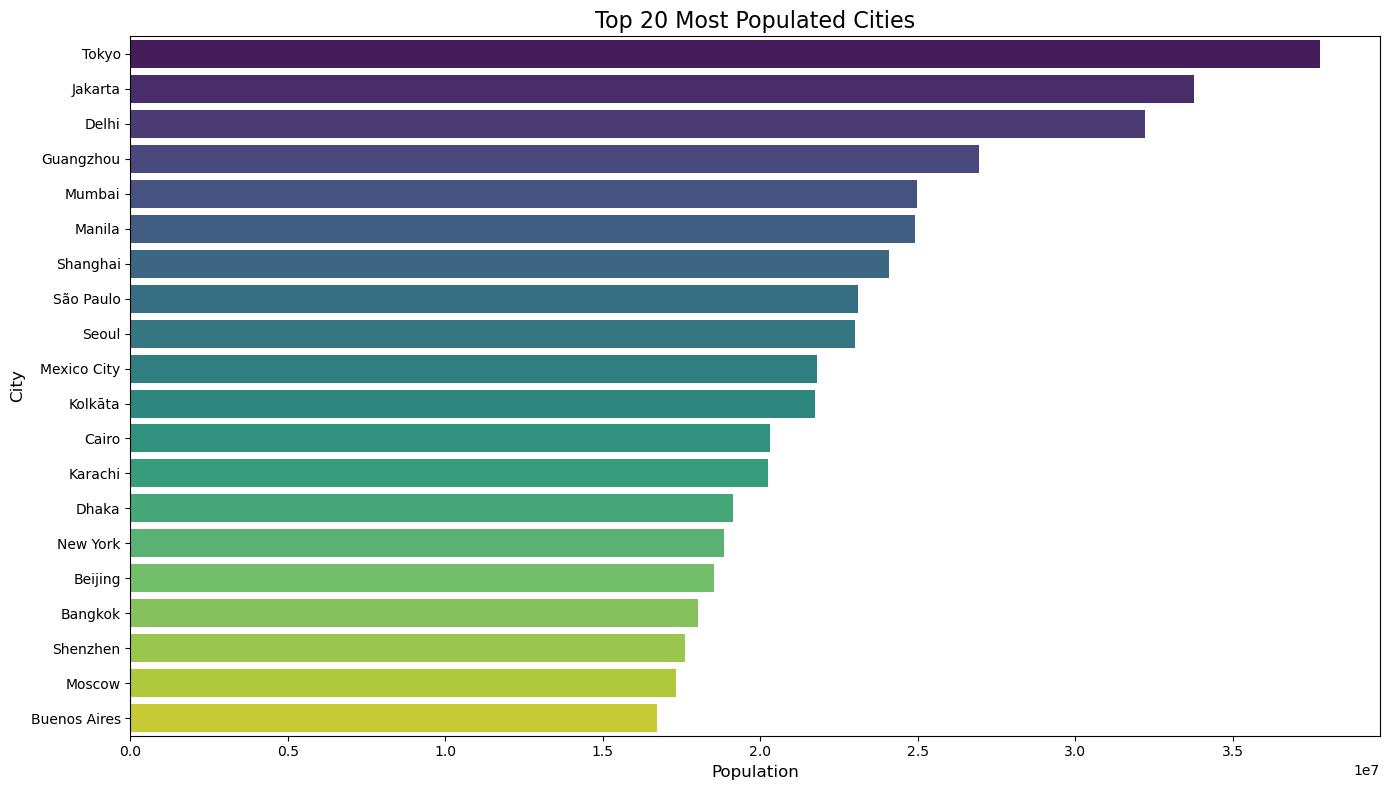

In [12]:
plt.figure(figsize=(14, 8))
sns.barplot(data=top_cities, x='population', y='city', palette='viridis')
plt.title('Top 20 Most Populated Cities', fontsize=16)
plt.xlabel('Population', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_23444\313165780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_population.sort_values('population', ascending=False).head(20), x='population', y='country', palette='viridis')


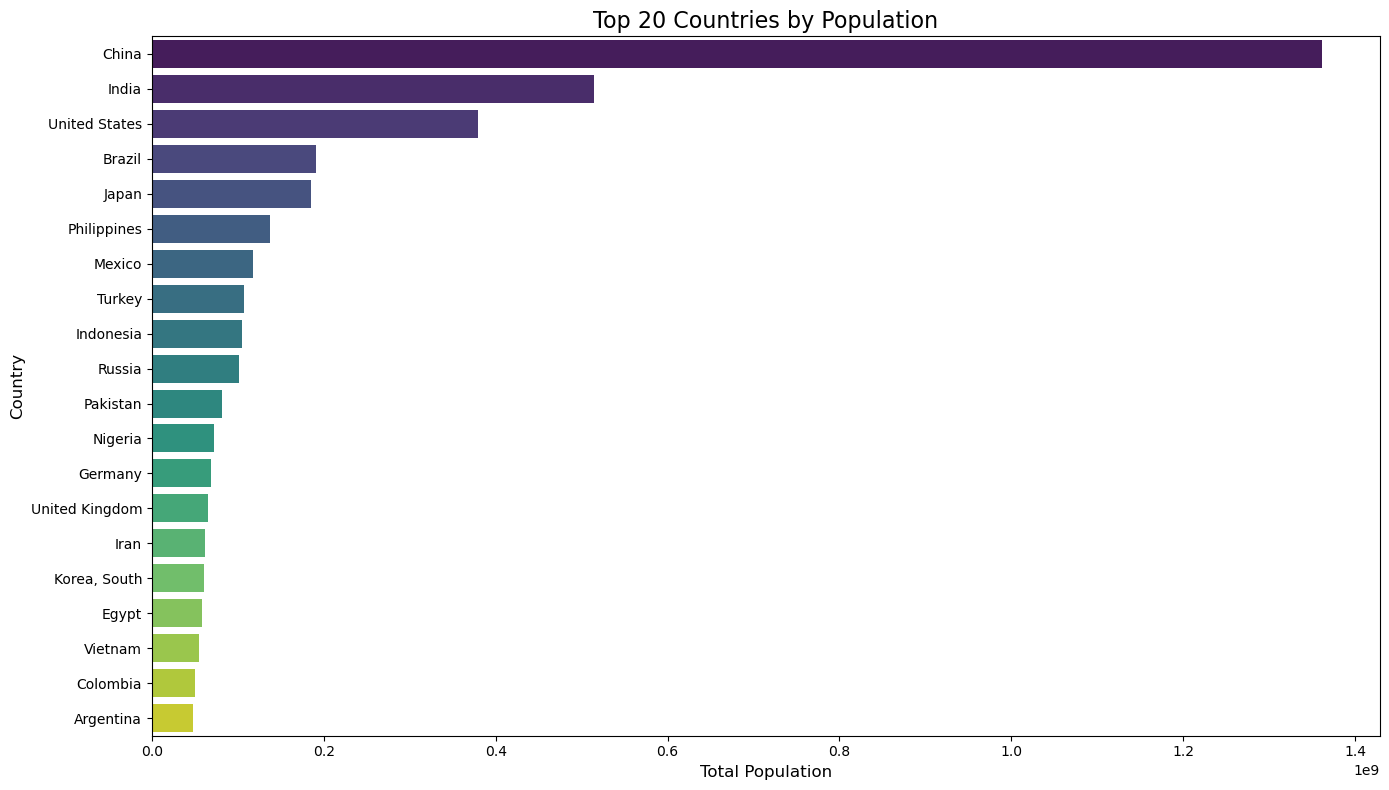

In [13]:
country_population = df.groupby('country')['population'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=country_population.sort_values('population', ascending=False).head(20), x='population', y='country', palette='viridis')
plt.title('Top 20 Countries by Population', fontsize=16)
plt.xlabel('Total Population', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

<Axes: xlabel='population', ylabel='Count'>

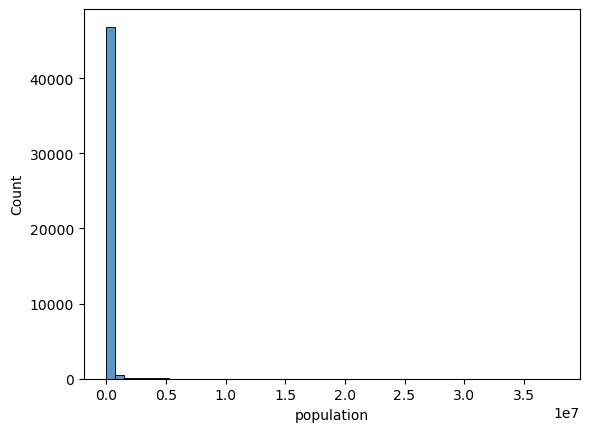

In [14]:
sns.histplot(df['population'], bins=50)

<Axes: xlabel='country'>

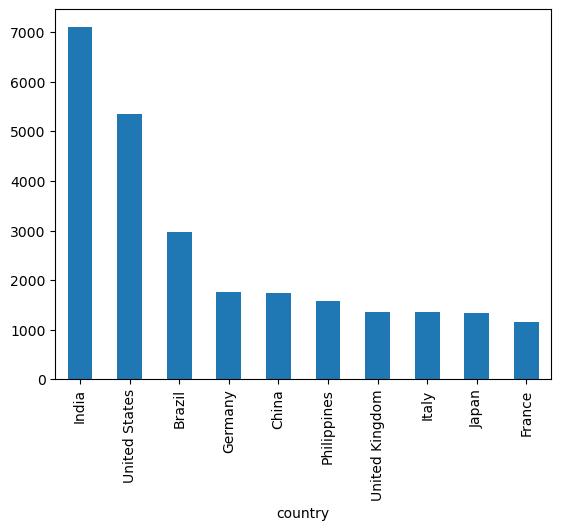

In [15]:
df['country'].value_counts().head(10).plot(kind='bar')

Text(0.5, 1.0, 'World Cities Scatter Plot (Geo)')

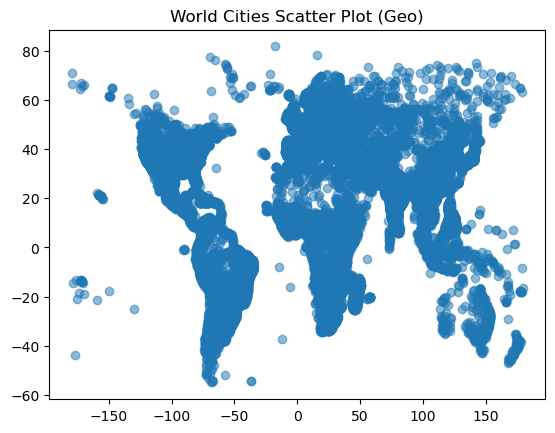

In [16]:
plt.scatter(df['lng'], df['lat'], alpha=0.5)
plt.title("World Cities Scatter Plot (Geo)")